
First, after we looking at the datasets and the features in corralation matrix, we can see that there are some features that are highly correlated with each other. 

This is a problem because it can lead to overfitting. To solve this problem, we can use dimensionality reduction techniques to reduce the number of features in the dataset. 

This will help us to avoid overfitting and also reduce the computational cost of the model.

## Data preprocessing
1. load the dataset named mental_health_DR.csv (it is the dataset after data cleaning in Naive Bayes). it has no missing values.
2. Convert categorical data to numerical.
3. Normalize the data. so the numerical data has a mean of 0 and standard deviation of 1.(This is crucial for PCA and t-SNE because they are sensitive to the scale of the data.)

In [122]:
#1.load data
import pandas as pd
df_reduction=pd.read_csv('./Data_Cleaned/mental_health_DR.csv')
#2. drop columns
df_reduction = df_reduction.drop(['Code','Year','Economy'], axis=1)
df_reduction.head()


,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Depression (%),Income group,average_learning_Adjusted_of_school,Continent,GDP(2022),GDP_per_capita
0,0.160560,0.697779,0.101855,4.828830,4.071831,Low income,4.957542,Asia,14583.0,3309.844
1,0.160312,0.697961,0.099313,4.829740,4.079531,Low income,4.957542,Asia,14583.0,3309.844
2,0.160135,0.698107,0.096692,4.831108,4.088358,Low income,4.957542,Asia,14583.0,3309.844
3,0.160037,0.698257,0.094336,4.830864,4.096190,Low income,4.957542,Asia,14583.0,3309.844
4,0.160022,0.698469,0.092439,4.829423,4.099582,Low income,4.957542,Asia,14583.0,3309.844


In [123]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
df_reduction.isnull().sum()

# 2.Encoding Categorical Data, so Categorical data is encoded numerically.
# Label encoding assigns each unique value to a different integer.
# we only encode the Income group column because it is ordinal, we don't encode the the Economy because it is nominal and it's not relevant to the analysis.
label_encoder = LabelEncoder()
df_reduction['Income group'] = label_encoder.fit_transform(df_reduction['Income group'])
df_reduction['Continent'] = label_encoder.fit_transform(df_reduction['Continent'])
# if there is missing value in the Income group column, we can use the following code to fill the missing value with the most frequent value
# df_reduction['Income group'] = df_reduction['Income group'].fillna(df_reduction['Income group'].mode()[0])

# 3.Normalizing the Data (The data is normalized to ensure that all features contribute equally to the analysis.)
# Normalization standardizes the range of features in your dataset, ensuring that each feature contributes equally to the analysis and is not dominated by those with larger magnitudes.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_reduction)

# Display the first few rows of the processed data
scaled_data_df = pd.DataFrame(scaled_data, columns=df_reduction.columns)
print(scaled_data_df.head())


   Schizophrenia (%)  Bipolar disorder (%)  Eating disorders (%)  \
0          -1.106590             -0.198086             -0.844308   
1          -1.112626             -0.196941             -0.860632   
2          -1.116943             -0.196017             -0.877464   
3          -1.119318             -0.195070             -0.892593   
4          -1.119686             -0.193730             -0.904771   

   Anxiety disorders (%)  Depression (%)  Income group  \
0               0.750876        0.928233     -0.464925   
1               0.751669        0.940304     -0.464925   
2               0.752859        0.954143     -0.464925   
3               0.752646        0.966422     -0.464925   
4               0.751393        0.971739     -0.464925   

   average_learning_Adjusted_of_school  Continent  GDP(2022)  GDP_per_capita  
0                            -1.188637   -0.41766  -0.261241       -0.386936  
1                            -1.188637   -0.41766  -0.261241       -0.386936  
2    

## A.Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that is used to reduce the dimensionality of a large number of interrelated variables while retaining as much as possible of the variation present in the dataset. PCA is an unsupervised learning algorithm, which means that it does not require labels to be trained on. PCA can be used for feature reduction before training a model.

1. Apply PCA.
2. Determine the optimal number of principal components.
3. Visualize the PCA results.


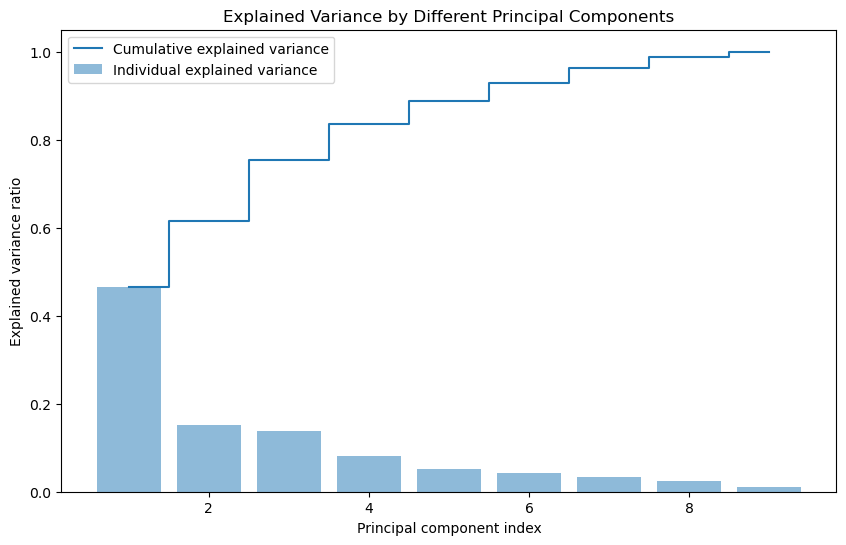

optimal_components is 7


In [124]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1.Applying PCA
pca = PCA()
labels=scaled_data_df['Income group']
scaled_data_df_1 = scaled_data_df.drop(['Income group'], axis=1)
pca_data = pca.fit_transform(scaled_data_df_1)

# 2.Determining the optimal number of principal components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 3.Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance by Different Principal Components')
plt.show()
# print('explained_variance is', explained_variance)
# print('cumulative_variance is', cumulative_variance)

# Using this plot, we can select the number of components that capture a sufficient amount of variance (e.g., 95%)
optimal_components = sum(cumulative_variance <= 0.95) + 1
print('optimal_components is', optimal_components)

Component 1: Individual variance = 0.4647, Cumulative variance = 0.4647
Component 2: Individual variance = 0.1506, Cumulative variance = 0.6154
Component 3: Individual variance = 0.1384, Cumulative variance = 0.7538
Component 4: Individual variance = 0.0810, Cumulative variance = 0.8347
Component 5: Individual variance = 0.0522, Cumulative variance = 0.8869
Component 6: Individual variance = 0.0422, Cumulative variance = 0.9291
Component 7: Individual variance = 0.0344, Cumulative variance = 0.9635
Component 8: Individual variance = 0.0251, Cumulative variance = 0.9886
Component 9: Individual variance = 0.0114, Cumulative variance = 1.0000


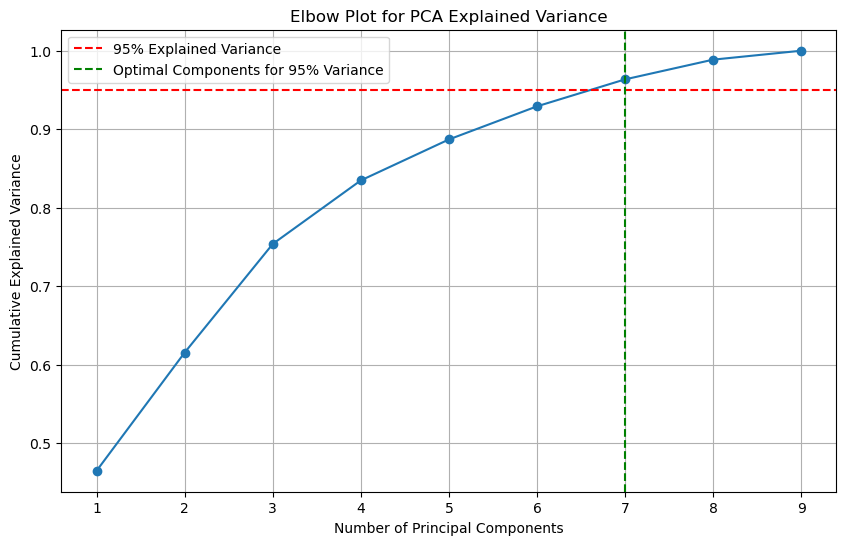

In [125]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1.Applying PCA
pca = PCA()
labels=scaled_data_df['Income group']
scaled_data_df_1 = scaled_data_df.drop(['Income group'], axis=1)

pca_data = pca.fit_transform(scaled_data_df_1)

# 2.Determining the optimal number of principal components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 3.Print the individual and cumulative explained variance
for i, (ind, cum) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"Component {i}: Individual variance = {ind:.4f}, Cumulative variance = {cum:.4f}")

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--', label='Optimal Components for 95% Variance')
plt.grid(True)
plt.legend()
plt.show()

The 2 plots above shows both the individual and cumulative explained variance by each principal component.

The first two principal component alone accounts for approximately 61.53% of the variance.

About 96.34% of the variance is explained by the first 7 components.

Visualize the data in the reduced dimension using PCA

Reducing the data to the first two and three principal components

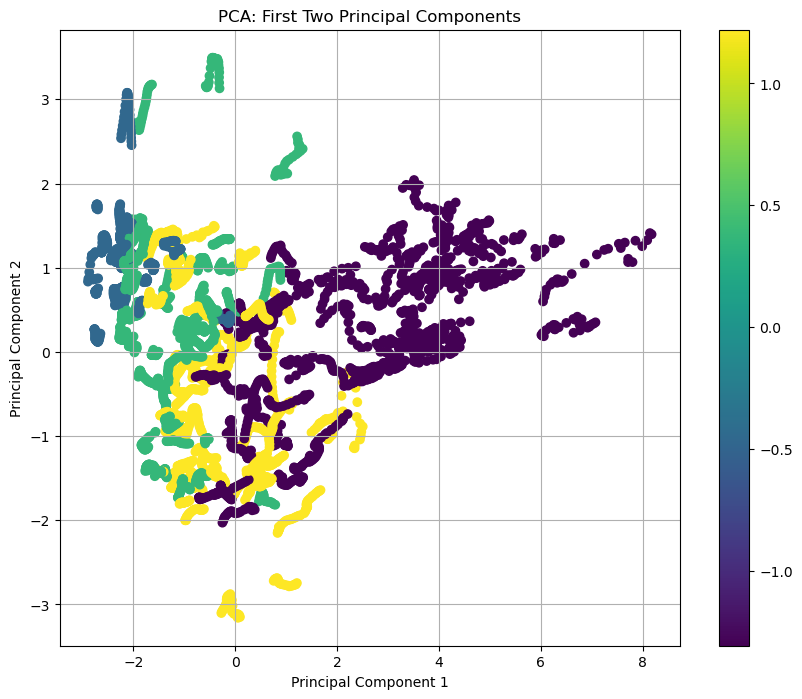

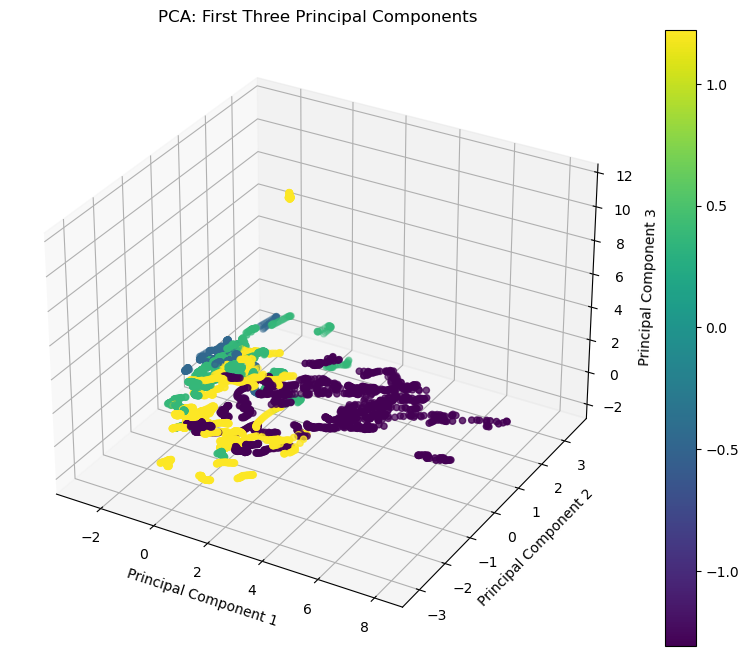

In [126]:
labels=scaled_data_df['Income group']
scaled_data_df_1 = scaled_data_df.drop(['Income group'], axis=1)

# Reducing the data to the first three principal components
pca_3 = PCA(n_components=3)
pca_3_data = pca_3.fit_transform(scaled_data_df_1)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_3_data, columns=['PC1', 'PC2', 'PC3'])
pca_df['Label'] = labels  # Add the labels to the DataFrame

# Plotting the first two principal components with colors
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Label'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar()  # Show color scale
plt.grid(True)
plt.show()
    
# Plotting the first three principal components with colors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Label'], cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA: First Three Principal Components')
fig.colorbar(scatter)  # Show color scale
plt.show()
# explained_variance.cumsum()


First Two Principal Components: The scatter plot of the first two principal components shows how the data points are spread out. This plot can be useful to identify clusters or patterns, although it's not immediately clear if distinct clusters are present in this case.

First Three Principal Components: The 3D plot including the first three principal components gives a more detailed view. This additional dimension can sometimes reveal structures that are not visible in two dimensions.

## B. t-SNE Implementation (to be done after PCA):

Perplexity is a critical parameter in the t-SNE algorithm that helps determine the scale at which the algorithm operates, influencing the balance between highlighting local versus global data structures. is about the expected density around a point rather than the number of clusters in the data. when Perplexity = 10, The algorithm will assume that each point has about 10 close neighbors, when Perplexity = 50, the algorithm will assume that each point has about 50 close neighbors. t-SNE is also an unsupervised technique that's used for visualization of the feature space. Only pass the feature set to the t-SNE algorithm, The target variable is separate and can be used after t-SNE transformation to color the data points in the visualization.  

Although t-SNE doesn't preserve global structures and distances, when we have labeled data, it can sometimes show whether classes or categories can be easily separated, which might imply that classification tasks could perform well.

1. Apply t-SNE. <br>
 Use scikit-learn's TSNE class.
    Experiment with different perplexity values (common choices are between 5 and 50).
    Set the number of components to 2 for visualization purposes.
2. Experiment with different perplexity values.
    Perplexity can be thought of as a measure of how to balance attention between local and global aspects of the data. Low perplexity values lead to more attention being paid to local aspects of the data while high perplexity values result in the global structure of the data being given more weight.
3. Visualize the t-SNE results.<br>
    plotting the two-dimensional t-SNE results.
4. Compare with PCA results.

   Schizophrenia (%)  Bipolar disorder (%)  Eating disorders (%)  \
0          -1.106590             -0.198086             -0.844308   
1          -1.112626             -0.196941             -0.860632   
2          -1.116943             -0.196017             -0.877464   
3          -1.119318             -0.195070             -0.892593   
4          -1.119686             -0.193730             -0.904771   

   Anxiety disorders (%)  Depression (%)  Income group  \
0               0.750876        0.928233     -0.464925   
1               0.751669        0.940304     -0.464925   
2               0.752859        0.954143     -0.464925   
3               0.752646        0.966422     -0.464925   
4               0.751393        0.971739     -0.464925   

   average_learning_Adjusted_of_school  Continent  GDP(2022)  GDP_per_capita  
0                            -1.188637   -0.41766  -0.261241       -0.386936  
1                            -1.188637   -0.41766  -0.261241       -0.386936  
2    

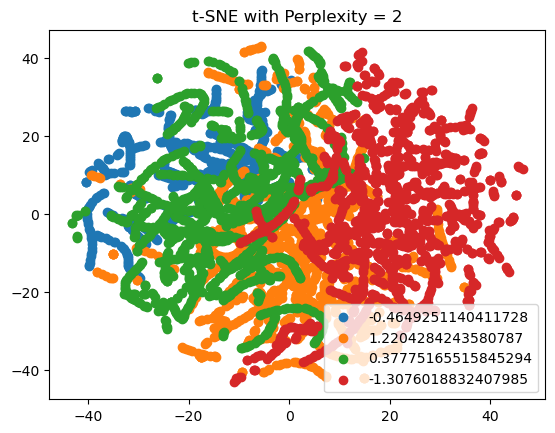

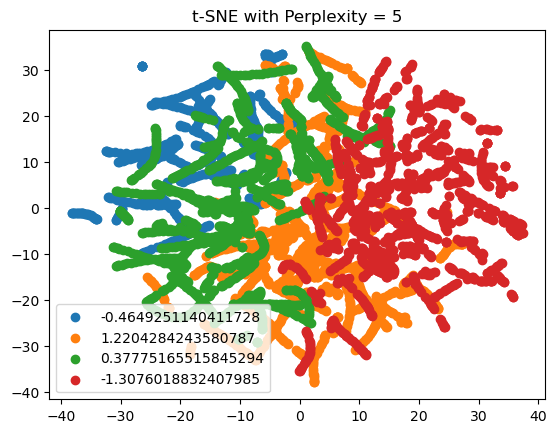

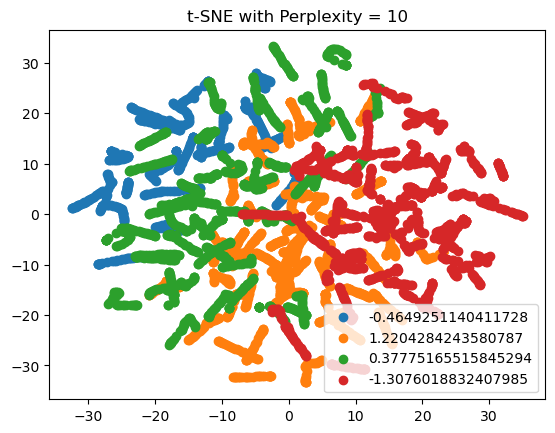

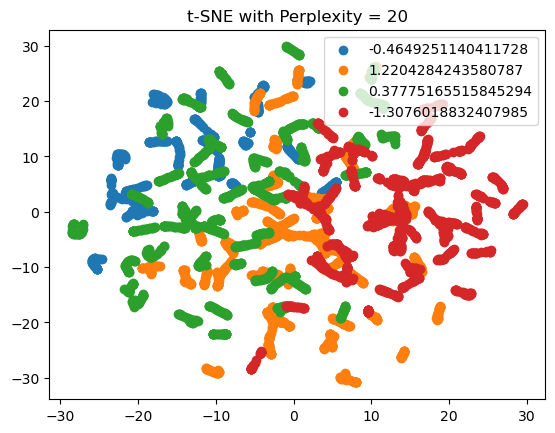

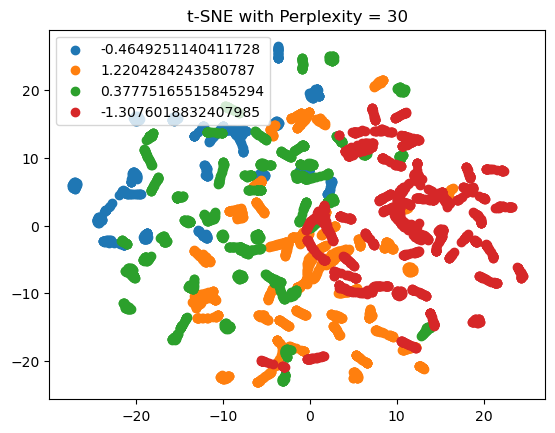

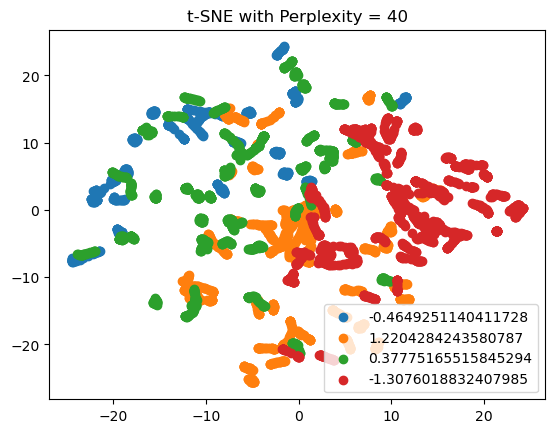

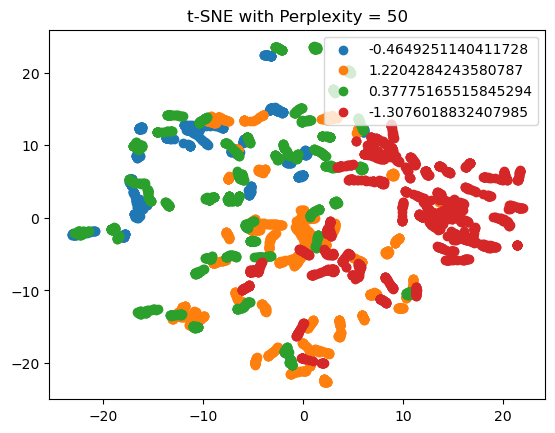

In [127]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

print(scaled_data_df.head())
labels = scaled_data_df['Income group']
unique_labels = labels.unique()

# Standardizing the features
X_std = StandardScaler().fit_transform(scaled_data_df.drop('Income group', axis=1))  # Make sure to exclude the label column

# Applying t-SNE with different perplexity values
perplexities = [2,5, 10, 20, 30,40,50]
for perplexity in perplexities:
    tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_std)

    # Visualization
    for i, unique_label in enumerate(unique_labels):
        # Select rows where the label equals the current unique label
        idxs = labels == unique_label
        plt.scatter(X_tsne[idxs, 0], X_tsne[idxs, 1], label=unique_label)
    
    plt.title(f't-SNE with Perplexity = {perplexity}')
    plt.legend()
    plt.show()

In summary, the t-SNE with a perplexity of 10 seems to be a good middle ground for my dataset, balancing local and global structures; offering a reasonable compromise between showing local groupings and fitting into the broader context of the entire dataset.


## Evaluation and Comparison:

1. Evaluate the effectiveness of both techniques.<br>

    Global vs. Local Structures: PCA tends to show the overall structure, while t-SNE can uncover local groupings and complex structures.
    
    Clarity of Clusters: Determine which method shows clearer clustering. t-SNE might reveal clusters that PCA cannot, especially in complex datasets.

    PCA is effective for understanding the overall variance and structure of the data. It's computationally efficient and provides a quick overview.
    t-SNE excels in revealing complex patterns and clusters, particularly useful for datasets where non-linear relationships are significant. However, it's more computationally intensive and its results can vary with different perplexity values.

2. Compare their visualization capabilities.<br>

    PCA<br>
    Global Structure Visualization: PCA is excellent at visualizing the global structure of the data. It reduces dimensions while preserving as much variance as possible, which is helpful for understanding the overall distribution and direction of the dataset.
    Linearity: The linear nature of PCA makes it suitable for datasets where relationships among variables are linear. The principal components are linear combinations of the original features, providing a straightforward interpretation.
    Limitation in Complexity: PCA might not be as effective in revealing complex, non-linear relationships. Clusters or patterns that are not linearly separable might be missed in PCA visualizations.
    Discuss trade-offs and scenarios for their use.<br>

    t-SNE:<br>
    Local Structure and Clusters: t-SNE excels in visualizing local structures and clusters, even when these clusters are formed through complex, non-linear relationships. It's particularly good at separating distinct groups in the data.
    Non-Linearity: t-SNE can uncover patterns and relationships that are not apparent with linear methods like PCA. This makes t-SNE visualizations more intricate and revealing for certain types of datasets.
    Sensitivity to Parameters: The output of t-SNE can be highly sensitive to the choice of perplexity and other parameters. This can lead to varying results, making interpretation sometimes subjective.

3. Trade-offs and Scenarios for Use <br>

    PCA:<br>
    Best Use Cases:
    When you need a quick overview of the data.
    In cases where linear relationships dominate.
    For preprocessing in machine learning, especially when model simplicity and computational efficiency are crucial.
    Trade-offs:
    PCA might oversimplify complex datasets by missing non-linear patterns.
    It’s not the best tool for datasets where clusters are formed through non-linear boundaries.

    t-SNE: <br>
    Best Use Cases:
    For detailed exploratory data analysis, especially when you suspect non-linear relationships in your data.
    In scenarios where distinguishing between different clusters or groups is more important than understanding the variance across the entire dataset.
    Trade-offs:
    t-SNE is computationally intensive and not suitable for very large datasets.
    The results can vary with different runs, requiring careful selection of parameters and interpretation of results.
    It’s not typically used as a preprocessing step for machine learning models due to its computational complexity and the difficulty in interpreting the transformed features.

## Conclusions<br>
The choice between PCA and t-SNE for visualization depends on the dataset characteristics and the specific goals of the analysis. PCA offers a fast, linear approach suitable for an overview and linearly separable data, while t-SNE provides a detailed, non-linear approach ideal for datasets with complex structures and relationships. The decision should align with the analysis objectives, considering the trade-offs in terms of computational efficiency, ease of interpretation, and the ability to uncover underlying patterns in the data.
